# <center>Telecom Churn Case Study

## Problem Statement

Telecommunications industry experiences an average of 15-25% annual churn rate. Since it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention is more important than customer acquisition.

Goal - 
To identify parameters which helps to retain high profitable customers.
To reduce customer churn, need to predict which customers are at high risk of churn.

Hence, we will analyse customer-level data of a given leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Reading the dataset
data = pd.read_csv(r"telecom_churn_data.csv")


In [3]:
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
# Checking the shape of the given data
data.shape

(99999, 226)

In [5]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
# Identifying different kinds of columns
id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
             'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
             'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

numerical_columns = data.select_dtypes(include=["int64","float64"]).columns.to_list()


In [7]:
# Seeing through the data
data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [8]:
print(numerical_columns)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f

In [9]:
### Calculating the missing percentage
columns_with_missing_val = round(100*(data.isnull().sum()/len(data.index)), 2)
columns_with_missing_val.sort_values(ascending = False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

## 1. Data Cleaning

In [10]:
df = data.copy()

In [11]:
# imputing categorical columns with mode
for i in cat_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)


In [12]:
df[cat_cols].isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

In [13]:
df[date_cols].isnull().sum()


last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
dtype: int64

In [14]:
# Checking other related columns for missing total_rech_data_6
df.loc[df.total_rech_data_6.isna() & df.date_of_last_rech_data_6.isna(),
                  ["total_rech_data_6", "date_of_last_rech_data_6"]].head()

total_rech_data_6 date_of_last_rech_data_6
1                NaN                      NaN
2                NaN                      NaN
3                NaN                      NaN
5                NaN                      NaN
6                NaN                      NaN

In [15]:
# Checking other related columns for missing total_rech_data_7
df.loc[df.total_rech_data_7.isna() & df.date_of_last_rech_data_7.isna(),
                  ["total_rech_data_7", "date_of_last_rech_data_7"]].head()

total_rech_data_7 date_of_last_rech_data_7
2                NaN                      NaN
3                NaN                      NaN
4                NaN                      NaN
5                NaN                      NaN
6                NaN                      NaN

In [16]:
# Checking other related columns for missing date_of_last_rech_data_8
df.loc[df.total_rech_data_8.isna() & df.date_of_last_rech_data_8.isna(),
                  ["total_rech_data_8", "date_of_last_rech_data_8"]].head()

total_rech_data_8 date_of_last_rech_data_8
2                NaN                      NaN
3                NaN                      NaN
4                NaN                      NaN
5                NaN                      NaN
6                NaN                      NaN

In [17]:
# Checking other related columns for missing date_of_last_rech_data_9
df.loc[df.total_rech_data_9.isna() & df.date_of_last_rech_data_9.isna(),
                  ["total_rech_data_9", "date_of_last_rech_data_9"]].head()

total_rech_data_9 date_of_last_rech_data_9
0                NaN                      NaN
1                NaN                      NaN
3                NaN                      NaN
4                NaN                      NaN
5                NaN                      NaN

#### So, we can impute these columns to 0

In [18]:
#Imputing these 4 columns to 0
df[['total_rech_data_6','date_of_last_rech_data_6']]= df[['total_rech_data_6','date_of_last_rech_data_6']].fillna(0)
df[['total_rech_data_7','date_of_last_rech_data_7']]= df[['total_rech_data_7','date_of_last_rech_data_7']].fillna(0)
df[['total_rech_data_8','date_of_last_rech_data_8']]= df[['total_rech_data_8','date_of_last_rech_data_8']].fillna(0)
df[['total_rech_data_9','date_of_last_rech_data_9']]= df[['total_rech_data_9','date_of_last_rech_data_9']].fillna(0)

In [19]:
df.drop(date_cols,axis =1, inplace = True)

In [20]:
columns_with_missing_val = round(100*(df.isnull().sum()/len(df.index)), 2)
columns_with_missing_val.sort_values(ascending = False)

arpu_2g_6             74.85
max_rech_data_6       74.85
av_rech_amt_data_6    74.85
count_rech_2g_6       74.85
arpu_3g_6             74.85
count_rech_3g_6       74.85
max_rech_data_7       74.43
count_rech_2g_7       74.43
count_rech_3g_7       74.43
arpu_2g_7             74.43
arpu_3g_7             74.43
av_rech_amt_data_7    74.43
arpu_3g_9             74.08
max_rech_data_9       74.08
arpu_2g_9             74.08
count_rech_2g_9       74.08
count_rech_3g_9       74.08
av_rech_amt_data_9    74.08
arpu_2g_8             73.66
arpu_3g_8             73.66
count_rech_2g_8       73.66
count_rech_3g_8       73.66
max_rech_data_8       73.66
av_rech_amt_data_8    73.66
std_og_t2f_mou_9       7.75
std_ic_t2t_mou_9       7.75
std_ic_t2m_mou_9       7.75
std_og_t2c_mou_9       7.75
std_ic_t2f_mou_9       7.75
loc_ic_t2f_mou_9       7.75
std_ic_t2o_mou_9       7.75
std_ic_mou_9           7.75
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_9       7.75
loc_ic_t2m_mou_9       7.75
isd_ic_mou_9        

In [21]:
#Imptuning the missing values in the Numerical Columns
df[numerical_columns] = df[numerical_columns].fillna(0)

In [22]:
columns_with_missing_val = round(100*(df.isnull().sum()/len(df.index)), 2)
columns_with_missing_val.sort_values(ascending = False)

sep_vbc_3g            0.0
total_og_mou_8        0.0
total_og_mou_6        0.0
og_others_9           0.0
og_others_8           0.0
og_others_7           0.0
og_others_6           0.0
spl_og_mou_9          0.0
spl_og_mou_8          0.0
spl_og_mou_7          0.0
spl_og_mou_6          0.0
isd_og_mou_9          0.0
isd_og_mou_8          0.0
isd_og_mou_7          0.0
isd_og_mou_6          0.0
std_og_mou_9          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2c_mou_9      0.0
std_og_t2c_mou_8      0.0
std_og_t2c_mou_7      0.0
std_og_t2c_mou_6      0.0
std_og_t2f_mou_9      0.0
std_og_t2f_mou_8      0.0
total_og_mou_7        0.0
total_og_mou_9        0.0
std_og_t2f_mou_6      0.0
loc_ic_t2t_mou_6      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2t_mou_9      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_7      0.0
std_ic_t2t_mou_6      0.0
loc_ic_mou_9          0.0
loc_ic_mou_8

In [23]:
df.nunique().sort_values(ascending=False)

mobile_number         99999
arpu_6                85681
arpu_7                85308
arpu_8                83615
arpu_9                79937
total_og_mou_7        40477
total_og_mou_6        40327
total_og_mou_8        40074
total_og_mou_9        39160
total_ic_mou_6        32247
total_ic_mou_7        32242
total_ic_mou_8        32128
total_ic_mou_9        31260
offnet_mou_6          31140
offnet_mou_7          31023
offnet_mou_8          30908
offnet_mou_9          30077
loc_ic_mou_6          28569
loc_ic_mou_7          28390
loc_ic_mou_8          28200
std_og_mou_7          27951
loc_ic_mou_9          27697
std_og_mou_6          27502
std_og_mou_8          27491
std_og_mou_9          26553
loc_og_mou_6          26372
loc_og_mou_7          26091
loc_og_mou_8          25990
loc_og_mou_9          25376
onnet_mou_7           24336
onnet_mou_6           24313
onnet_mou_8           24089
onnet_mou_9           23565
loc_ic_t2m_mou_6      22065
loc_ic_t2m_mou_7      21918
loc_ic_t2m_mou_8    

#### Columns with unique values

In [24]:
unique_values = []
for i in df.columns:
    if df[i].nunique() == 1:
        unique_values.append(i)


In [25]:
df.drop(unique_values, axis = 1, inplace = True)

## 2. Filtering high value customers

In [26]:
# New DERIVED Columns for Total Data Recharge Amount w.r.t month
df["total_rech_data_amt_6"] = df["total_rech_data_6"]*df['av_rech_amt_data_6']
df["total_rech_data_amt_7"] = df["total_rech_data_7"]*df['av_rech_amt_data_7']
df["total_rech_data_amt_8"] = df["total_rech_data_8"]*df['av_rech_amt_data_8']
df["total_rech_data_amt_9"] = df["total_rech_data_9"]*df['av_rech_amt_data_9']

In [27]:
# Now Dropping irrelevant columns
drop_recharge_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
df.drop(drop_recharge_data_columns, axis=1, inplace=True)

In [28]:
# Let's Filter high-value customers
avg_rech_amt_6_7 = (df["total_rech_amt_6"] + df["total_rech_data_amt_6"] + 
                      df["total_rech_amt_7"] + df["total_rech_data_amt_7"]) / 2.0
amount_70_pc = np.percentile(avg_rech_amt_6_7, 70.0)
print('70 percentile of first two months avg recharge amount: ', amount_70_pc)

df = df[avg_rech_amt_6_7 >= amount_70_pc]
print('Dataframe Shape: ', df.shape)

70 percentile of first two months avg recharge amount:  478.0
Dataframe Shape:  (30001, 198)


## 3. Let's identify churn customers

In [29]:
# Identify Churn
X = df["total_ic_mou_9"] + df["total_og_mou_9"] + df["vol_2g_mb_9"] + df["vol_3g_mb_9"]
df["churn"] = np.where(X, 0, 1)

In [30]:
# print churn ratio
print("Churn Ratio:")
print(df.churn.value_counts()*100/df.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


In [31]:
# Now we can drop 9th month columns
df.drop(df.filter(regex='sep|_9', axis = 1).columns, axis=1,inplace=True)

In [32]:
df.shape

(30001, 150)

#### Let's check for outliers

In [33]:
#Outliers at 25%,50%,75%,90%,95% and 99%
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  30001.000000   
mean    7.001206e+09    558.490824    560.782203    508.597957    260.793024   
std     6.908784e+05    460.640461    479.776947    501.961981    459.644368   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
25%     7.000609e+09    309.865000    309.826000    231.473000     17.080000   
50%     7.001203e+09    481.694000    480.943000    427.585000     84.580000   
75%     7.001804e+09    699.943000    698.315000    661.491000    290.440000   
90%     7.002165e+09    994.099000    995.859000    977.345000    754.160000   
95%     7.002285e+09   1240.964000   1261.272000   1255.019000   1135.440000   
99%     7.002386e+09   1985.115000   1999.500000   1986.622000   2151.740000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     267.819295    234.112539    373.693961    378.103169    335.077044   
std      479.993989    458.448598    482.523558    498.923555    482.062509   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       16.030000     10.390000     71.610000     69.910000     46.740000   
50%       82.810000     65.610000    222.540000    220.030000    182.790000   
75%      290.240000    239.960000    487.940000    494.010000    438.890000   
90%      784.480000    665.080000    895.830000    916.080000    823.680000   
95%     1185.790000   1074.590000   1256.610000   1272.290000   1167.540000   
99%     2201.960000   2159.110000   2326.360000   2410.890000   2193.130000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       16.110355      12.642504      12.500551      26.571547   
std        76.302156      75.785903      74.125281     116.205525   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        27.390000      14.290000      15.010000      50.430000   
95%        84.540000      55.640000      56.350000     145.410000   
99%       342.440000     280.460000     282.190000     530.710000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30001.000000   30001.000000      30001.000000      30001.000000   
mean       20.152086      19.865615         84.484753         85.674287   
std        96.100428     104.719009        228.794004        240.525999   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.380000          4.610000   
50%         0.000000       0.000000         24.330000         24.680000   
75%         0.000000       0.000000         77.980000         78.340000   
90%        31.090000      28.880000        187.930000        190.840000   
95%       104.240000     100.510000        322.740000        324.390000   
99%       438.590000     427.030000       1006.360000       1018.530000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean          78.077112        163.243297        163.009963        151.756812   
std          227.373609        250.116700        241.576705        233.660905   
min            0.000000          0.000000  

### Exploratory Data Analysis
Univariate
Bivatiate Analysis
Check imbalance in data-set (dependent variable)

In [34]:
df1 = df.copy()

#### Dependent Variable: check data imbalance

In [35]:
#checking whether data is imbalanced or not
churn  = df1["churn"].value_counts()
churn_rate = churn[1]/(churn[1] + churn[0])

print("Total Churn Count     = {}".format(churn[1]))
print("Total Not-Churn Count = {}".format(churn[0]))
print("Churn Rate            = {:.2f}%".format(churn_rate*100))


Total Churn Count     = 2441
Total Not-Churn Count = 27560
Churn Rate            = 8.14%


In [36]:
df_churn     = df1[df1["churn"] == 1]
df_not_churn = df1[df1["churn"] == 0]

#### Univariate Analysis on 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'

In [37]:
print("Mean:")
print(np.mean(df_churn["total_rech_amt_6"]))
print(np.mean(df_not_churn["total_rech_amt_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_6"]))
print(np.median(df_churn["total_rech_amt_6"]))

print("Quantiles:")
print(np.percentile(df_churn["total_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(df_not_churn["total_rech_amt_6"],np.arange(0,100,25)))

Mean:
786.7070872593199
649.574709724238
median:
558.0
660.0
Quantiles:
[   0.  406.  660. 1002.]
[  0.   358.   558.   816.25]


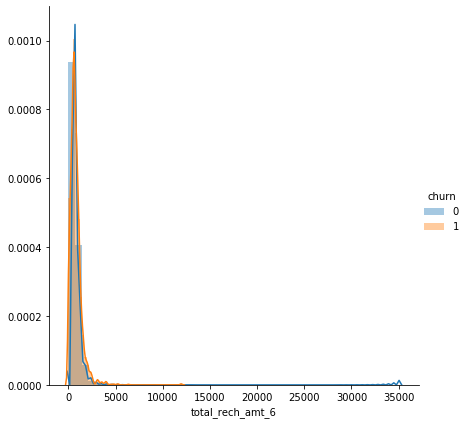

In [38]:
#Importance of total_rech_amt_6 using histogram for univiraite analysis
sns.FacetGrid(df1,hue='churn',size=6).map(sns.distplot,"total_rech_amt_6").add_legend()

In [39]:
print("Mean:")
print(np.mean(df_churn["total_rech_amt_7"]))
print(np.mean(df_not_churn["total_rech_amt_7"]))
print("median:")
print(np.median(df_churn["total_rech_amt_7"]))
print(np.median(df_not_churn["total_rech_amt_7"]))


print("Quantiles:")
print(np.percentile(df_churn["total_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(df_not_churn["total_rech_amt_7"],np.arange(0,100,25)))


Mean:
626.2900450634986
663.5278301886792
median:
526.0
565.0
Quantiles:
[  0. 242. 526. 847.]
[  0. 360. 565. 830.]


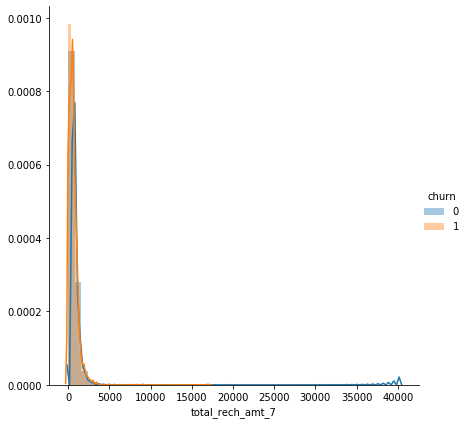

In [40]:
#Importance of total_rech_amt_7 using histogram for univiraite analysis
sns.FacetGrid(df,hue='churn',size=6).map(sns.distplot,"total_rech_amt_7").add_legend()

In [41]:
print("Mean:")
print(np.mean(df_churn["total_rech_amt_8"]))
print(np.mean(df_not_churn["total_rech_amt_8"]))

print("median:")
print(np.median(df_churn["total_rech_amt_8"]))
print(np.median(df_not_churn["total_rech_amt_8"]))


print("Quantiles:")
print(np.percentile(df_churn["total_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(df_not_churn["total_rech_amt_8"],np.arange(0,100,25)))

Mean:
253.15280622695616
613.7010885341074
median:
45.0
510.0
Quantiles:
[  0.   0.  45. 350.]
[  0. 280. 510. 797.]


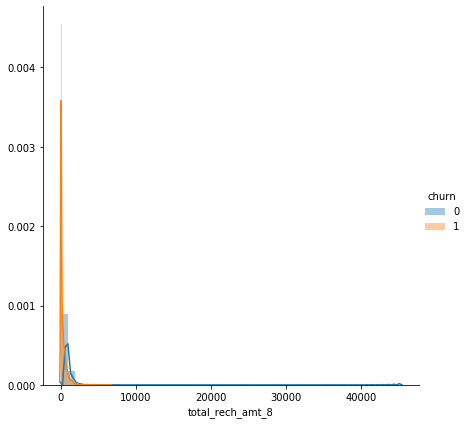

In [42]:
#Importance of total_rech_amt_8 using histogram for univiraite analysis
sns.FacetGrid(df1,hue='churn',size=6).map(sns.distplot,"total_rech_amt_8").add_legend()

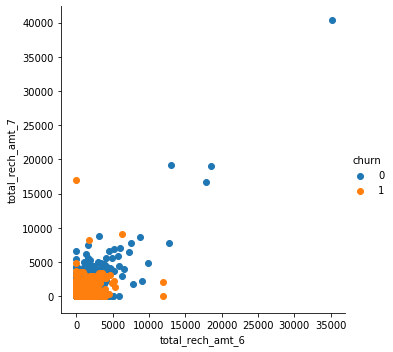

In [43]:
sns.FacetGrid(df1,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_7").add_legend()

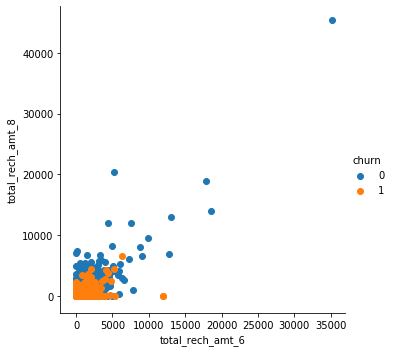

In [44]:
sns.FacetGrid(df1,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_8").add_legend()

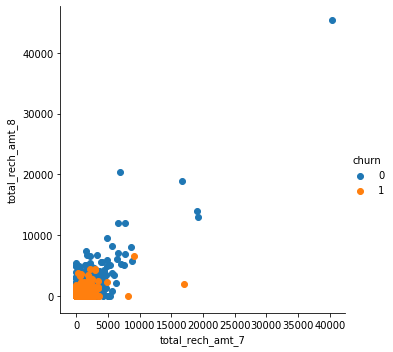

In [45]:
sns.FacetGrid(df1,hue='churn',size=5).map(plt.scatter,"total_rech_amt_7","total_rech_amt_8").add_legend()

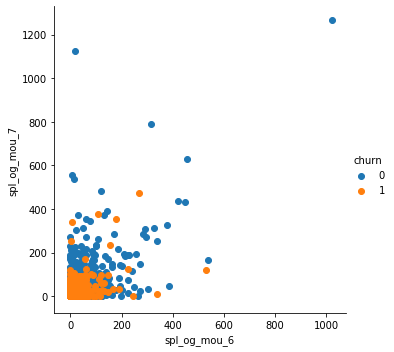

In [46]:
sns.FacetGrid(df1,hue='churn',size=5).map(plt.scatter,"spl_og_mou_6","spl_og_mou_7").add_legend()

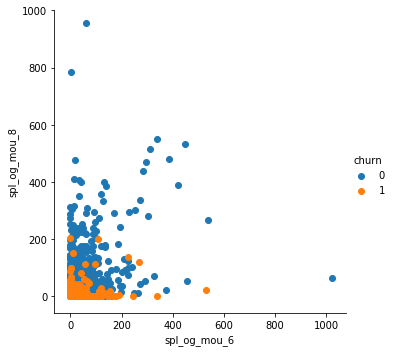

In [47]:
sns.FacetGrid(df1,hue='churn',size=5).map(plt.scatter,"spl_og_mou_6","spl_og_mou_8").add_legend()

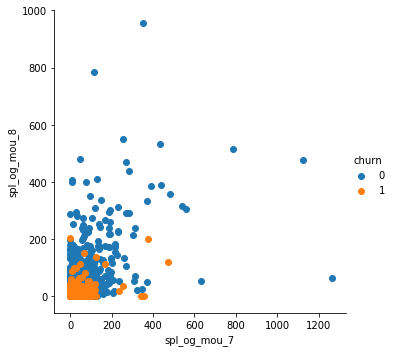

In [48]:
sns.FacetGrid(df1,hue='churn',size=5).map(plt.scatter,"spl_og_mou_7","spl_og_mou_8").add_legend()

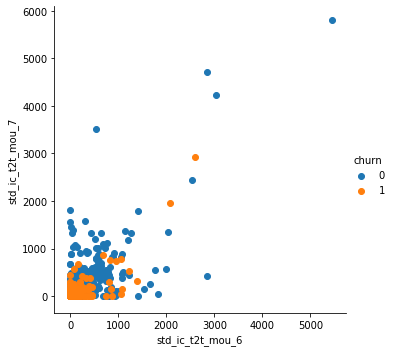

In [49]:
sns.FacetGrid(df1,hue='churn',size=5).map(plt.scatter,"std_ic_t2t_mou_6","std_ic_t2t_mou_7").add_legend()


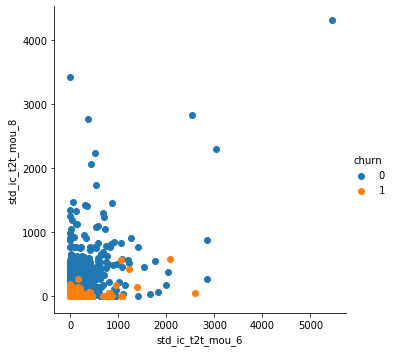

In [50]:
sns.FacetGrid(df1,hue='churn',size=5).map(plt.scatter,"std_ic_t2t_mou_6","std_ic_t2t_mou_8").add_legend()

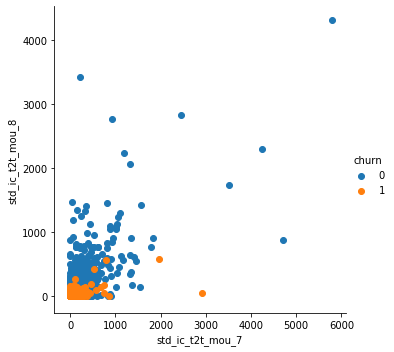

In [51]:
sns.FacetGrid(df1,hue='churn',size=5).map(plt.scatter,"std_ic_t2t_mou_7","std_ic_t2t_mou_8").add_legend()

#### Bivariate Analysis: Correlation Matrix

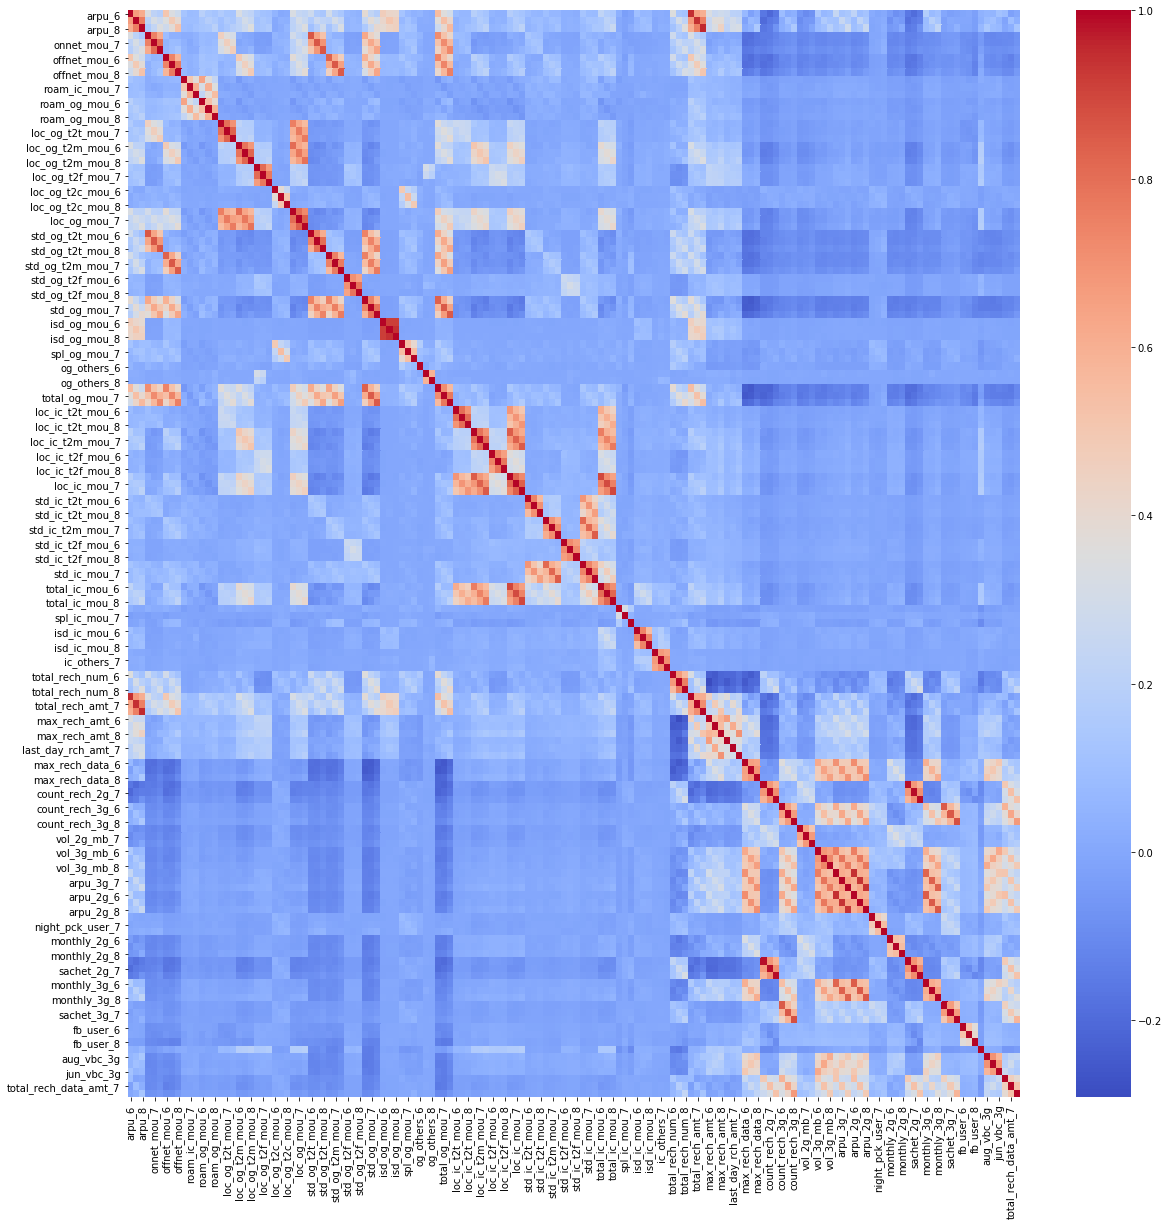

In [52]:
df_cor = df1.drop(['mobile_number', 'churn'], axis=1)

# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(df_cor.corr(), cmap="coolwarm")

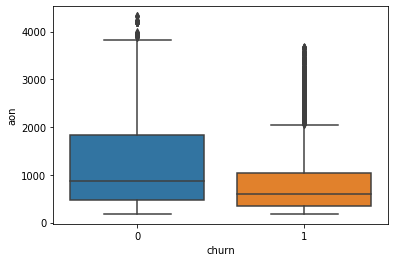

In [53]:
sns.boxplot(x='churn',y='aon',data=df1)
plt.show()

In [54]:
# Create correlation matrix
corr_matrix = df_cor.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("HIGHLY CORRELATED FEATURES IN DATA SET:{}\n\n{}".format(len(high_corr_features), high_corr_features))

HIGHLY CORRELATED FEATURES IN DATA SET:45

['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


In [55]:
# So, 45 highly correlated features (> 80%) found in the data set.
# Let's use RFE.

### FEATURE REDUCTION USING RFE & LOGISTIC REGRESSION

In [56]:
df2 = df1.copy()
df2.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00          0.00          0.00          0.00           0.00   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21          

In [57]:
print('Dataframe Shape: ', df2.shape);
print("Dataframe Info: \n"); df2.info();

Dataframe Shape:  (30001, 150)
Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 150 entries, mobile_number to churn
dtypes: float64(123), int32(1), int64(26)
memory usage: 34.4 MB


In [58]:
# Create X (independent variable) & y (dependent variable)
df2 = df2.drop(['mobile_number'], axis = 1)
df_tel = df2.drop(['churn'], axis=1)
X = df2.drop(['churn'], axis=1)
y = df2['churn']

In [59]:
X.shape

(30001, 148)

## 4. Data Preparation

#### Data Standardization/Normalization

In [60]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

#### Split Data into Train & Test

In [61]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [62]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

X_train Dataframe Shape (21000, 148)
X_test Dataframe Shape (9001, 148)
Imbalance in Train Data: 0.08875985068436333
Imbalance in Test Data: 0.08812862669245648


#### Let's balance data set by oversampling

In [63]:
# (Training) Balance Data-Set - SMOT
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [64]:
print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (38576, 148)
y_tr Dataframe Shape (38576,)
Imbalance in Train Data: 1.0


#### - So, there is no more imbalance present now

#### Feature reduction using RFE

In [65]:
# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 18 variables as output
rfe = RFE(logreg, 18)   
rfe = rfe.fit(X_tr, y_tr)

In [66]:
rfe_features = list(df_tel.columns[rfe.support_])
print("Below are the Features identified by RFE for model buidling: ", rfe_features)

Below are the Features identified by RFE for model buidling:  ['offnet_mou_7', 'roam_og_mou_7', 'loc_og_t2m_mou_7', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'og_others_8', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_8', 'count_rech_2g_8', 'monthly_2g_8', 'monthly_3g_8']


In [67]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

## 5. Modelling

### Logistic Regression Model

In [68]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(X_rfe, y_rfe)

LogisticRegression(random_state=1)

In [69]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]
y_pred = classifier.predict(X_test_rfe)

In [70]:
from sklearn.metrics import confusion_matrix
def evaluate_model(dt_classifier,x,y,x1,y1):
    
    print("Train Accuracy :", accuracy_score(y, dt_classifier.predict(x)))
    print("Train Confusion Matrix:")
    conf_mat=confusion_matrix(y, dt_classifier.predict(x))
    print(conf_mat)
    TP = conf_mat[1,1] # true positive 
    TN = conf_mat[0,0] # true negatives
    FP = conf_mat[0,1] # false positives
    FN = conf_mat[1,0] # false negatives
    print("Sesnitivity/Recall : ", (TP / float(TP+FN)))
    print("Specificity : ", TN / float(TN+FP))
    print("False Postive Rate : ", FP/ float(TN+FP))
    print("Precision : ", TP / float(TP+FP))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y1, dt_classifier.predict(x1)))
    print("Test Confusion Matrix:")
    conf_mat=confusion_matrix(y1, dt_classifier.predict(x1))
    print(conf_mat)
    TP = conf_mat[1,1] # true positive 
    TN = conf_mat[0,0] # true negatives
    FP = conf_mat[0,1] # false positives
    FN = conf_mat[1,0] # false negatives
    print("Sesnitivity/Recall : ", (TP / float(TP+FN)))
    print("Specificity : ", TN / float(TN+FP))
    print("False Postive Rate : ", FP/ float(TN+FP))
    print("Precision : ", TP / float(TP+FP))

In [71]:
evaluate_model(classifier,X_rfe, y_rfe, X_test_rfe, y_test)

Train Accuracy : 0.8395634591455827
Train Confusion Matrix:
[[15542  3746]
 [ 2443 16845]]
Sesnitivity/Recall :  0.8733409373703858
Specificity :  0.8057859809207798
False Postive Rate :  0.19421401907922023
Precision :  0.8180758583847312
--------------------------------------------------
Test Accuracy : 0.802799688923453
Test Confusion Matrix:
[[6639 1633]
 [ 142  587]]
Sesnitivity/Recall :  0.8052126200274349
Specificity :  0.8025870406189555
False Postive Rate :  0.1974129593810445
Precision :  0.26441441441441443


OBSERVATIONS:
Getting 80.0% accuracy
Confusion matix clearly shows that the model has drawback in predicting churn as high false positives.
Key features obtained from RFE:
['offnet_mou_7', 'roam_og_mou_7', 'loc_og_t2m_mou_7', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'og_others_8', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_8', 'count_rech_2g_8', 'monthly_2g_8', 'monthly_3g_8']

NEXT STEP:
Will use other models that suits this problem.

### Let's check with Decision Trees

In [72]:
df3 = df2.copy()

In [73]:
# Creating X and y 
X = df3.drop(['churn'],axis=1)
y = df3['churn']

In [74]:
# Creating Train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [75]:
# Let's check the shpe of the train and test
X_train.shape, X_test.shape

((21000, 148), (9001, 148))

In [76]:
# Importing required library for Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_base = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [77]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [78]:
def evaluate_model(dt_classifier):
    
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    conf_mat=confusion_matrix(y_train, dt_classifier.predict(X_train))
    print(conf_mat)
    TP = conf_mat[1,1] # true positive 
    TN = conf_mat[0,0] # true negatives
    FP = conf_mat[0,1] # false positives
    FN = conf_mat[1,0] # false negatives
    print("Sesnitivity/Recall : ", (TP / float(TP+FN)))
    print("Specificity : ", TN / float(TN+FP))
    print("False Postive Rate : ", FP/ float(TN+FP))
    print("Precision : ", TP / float(TP+FP))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    conf_mat=confusion_matrix(y_test, dt_classifier.predict(X_test))
    print(conf_mat)
    TP = conf_mat[1,1] # true positive 
    TN = conf_mat[0,0] # true negatives
    FP = conf_mat[0,1] # false positives
    FN = conf_mat[1,0] # false negatives
    print("Sesnitivity/Recall : ", (TP / float(TP+FN)))
    print("Specificity : ", TN / float(TN+FP))
    print("False Postive Rate : ", FP/ float(TN+FP))
    print("Precision : ", TP / float(TP+FP))

In [79]:
evaluate_model(dt_base)

Train Accuracy : 0.8611428571428571
Train Confusion Matrix:
[[16637  2672]
 [  244  1447]]
Sesnitivity/Recall :  0.8557066824364281
Specificity :  0.861618934175773
False Postive Rate :  0.13838106582422705
Precision :  0.3512988589463462
--------------------------------------------------
Test Accuracy : 0.8609043439617821
Test Confusion Matrix:
[[7125 1126]
 [ 126  624]]
Sesnitivity/Recall :  0.832
Specificity :  0.8635316931281057
False Postive Rate :  0.13646830687189432
Precision :  0.3565714285714286


#### Plotting ROC curve

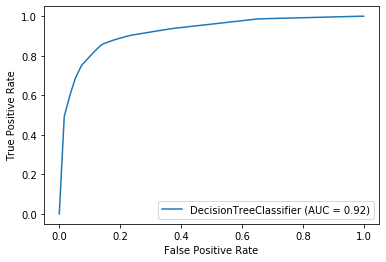

In [80]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

In [81]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.metrics import accuracy_score

In [82]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Churned', "Not Churned"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

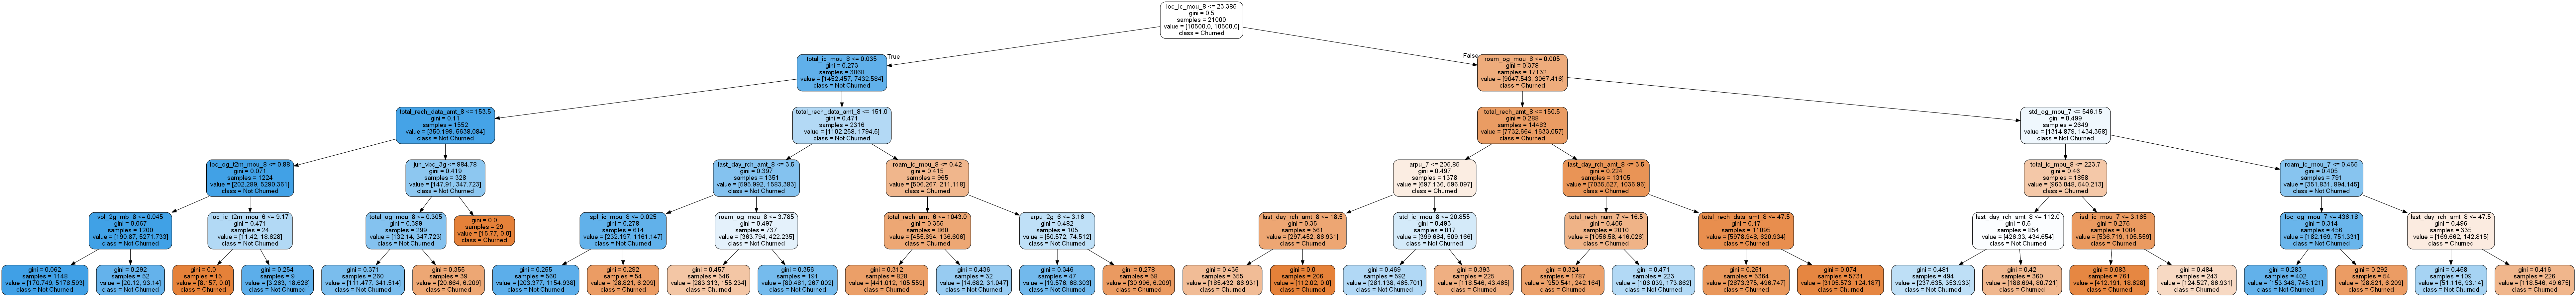

In [83]:
gph = get_dt_graph(dt_base)
Image(gph.create_png())

In [84]:
evaluate_model(dt_base)

Train Accuracy : 0.8611428571428571
Train Confusion Matrix:
[[16637  2672]
 [  244  1447]]
Sesnitivity/Recall :  0.8557066824364281
Specificity :  0.861618934175773
False Postive Rate :  0.13838106582422705
Precision :  0.3512988589463462
--------------------------------------------------
Test Accuracy : 0.8609043439617821
Test Confusion Matrix:
[[7125 1126]
 [ 126  624]]
Sesnitivity/Recall :  0.832
Specificity :  0.8635316931281057
False Postive Rate :  0.13646830687189432
Precision :  0.3565714285714286


### Hyper-parameter tuning for the Decision Tree

In [85]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42,class_weight='balanced')

In [86]:
params = {
    "max_depth": [2,3,5,10],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [87]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [88]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.1min finished


Wall time: 1min 11s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [89]:
grid_search.best_score_

0.8792857142857142

In [90]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, random_state=42)

In [91]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

In [92]:
evaluate_model(dt_best)

Train Accuracy : 0.9155238095238095
Train Confusion Matrix:
[[17600  1709]
 [   65  1626]]
Sesnitivity/Recall :  0.9615612063867534
Specificity :  0.9114920503392201
False Postive Rate :  0.08850794966077995
Precision :  0.48755622188905545
--------------------------------------------------
Test Accuracy : 0.8833462948561271
Test Confusion Matrix:
[[7367  884]
 [ 166  584]]
Sesnitivity/Recall :  0.7786666666666666
Specificity :  0.8928614713368077
False Postive Rate :  0.10713852866319235
Precision :  0.3978201634877384


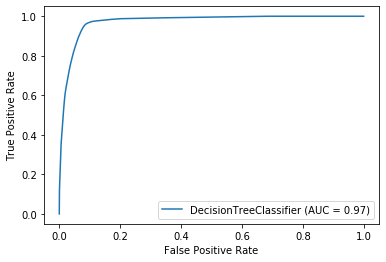

In [93]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

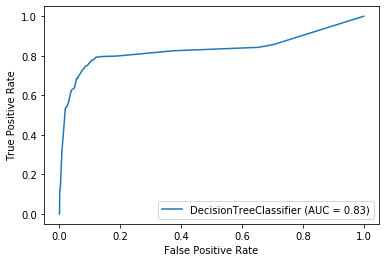

In [94]:
plot_roc_curve(dt_best, X_test, y_test)
plt.show()

### Let's use Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf_base = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=12, random_state=100, oob_score=True,class_weight='balanced')

In [96]:
%%time
rf_base.fit(X_train, y_train)

Wall time: 1.25 s


RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=12,
                       n_estimators=10, oob_score=True, random_state=100)

In [97]:
rf_base.oob_score_

0.8846666666666667

In [98]:
evaluate_model(rf_base)

Train Accuracy : 0.9054285714285715
Train Confusion Matrix:
[[17707  1602]
 [  384  1307]]
Sesnitivity/Recall :  0.7729154346540509
Specificity :  0.9170335076907141
False Postive Rate :  0.08296649230928582
Precision :  0.44929529047782746
--------------------------------------------------
Test Accuracy : 0.9068992334185091
Test Confusion Matrix:
[[7601  650]
 [ 188  562]]
Sesnitivity/Recall :  0.7493333333333333
Specificity :  0.9212216701005939
False Postive Rate :  0.07877832989940613
Precision :  0.4636963696369637


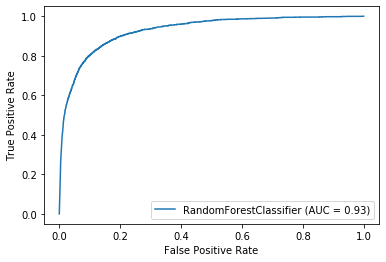

In [99]:
plot_roc_curve(rf_base, X_train, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [100]:
rf = RandomForestClassifier(random_state=42,max_features=15,n_jobs=-1,class_weight='balanced')

In [101]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [102]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [103]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 14.1min finished


Wall time: 14min 19s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_features=15, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [104]:
grid_search.best_score_

0.9409047619047619

In [105]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=15,
                       min_samples_leaf=5, n_jobs=-1, random_state=42)

In [106]:
evaluate_model(rf_best)

Train Accuracy : 0.9816190476190476
Train Confusion Matrix:
[[18940   369]
 [   17  1674]]
Sesnitivity/Recall :  0.989946777054997
Specificity :  0.9808897405355016
False Postive Rate :  0.01911025946449842
Precision :  0.8193832599118943
--------------------------------------------------
Test Accuracy : 0.9448950116653705
Test Confusion Matrix:
[[8051  200]
 [ 296  454]]
Sesnitivity/Recall :  0.6053333333333333
Specificity :  0.9757605138771058
False Postive Rate :  0.024239486122894196
Precision :  0.6941896024464832


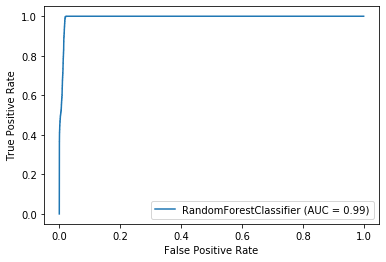

In [107]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

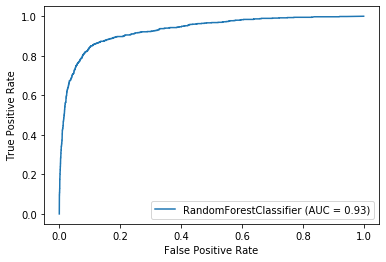

In [108]:
plot_roc_curve(rf_best, X_test, y_test)
plt.show()

In [109]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [110]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
65            loc_ic_mou_8  0.063444
59        loc_ic_t2m_mou_8  0.060965
56        loc_ic_t2t_mou_8  0.044718
80          total_ic_mou_8  0.044169
29            loc_og_mou_8  0.043475
101     last_day_rch_amt_8  0.039510
20        loc_og_t2m_mou_8  0.034889
14           roam_og_mou_8  0.032318
95        total_rech_amt_8  0.030584
53          total_og_mou_8  0.029617
11           roam_ic_mou_8  0.023650
62        loc_ic_t2f_mou_8  0.023633
147  total_rech_data_amt_8  0.019296
98          max_rech_amt_8  0.018810
17        loc_og_t2t_mou_8  0.017155
2                   arpu_8  0.015693
77            std_ic_mou_8  0.015448
104        max_rech_data_8  0.014232
113            vol_2g_mb_8  0.014022
8             offnet_mou_8  0.012728
41            std_og_mou_8  0.009944
1                   arpu_7  0.009856
5              onnet_mou_8  0.008513
141                    aon  0.008122
71        std_ic_t2m_mou_8  0.007859
64            loc_ic_mou_7  0.007856
94        total_rech_amt_7  0.007468
116            vol_3g_mb_8  0.007436
40            std_og_mou_7  0.007119
68        std_ic_t2t_mou_8  0.007087
58        loc_ic_t2m_mou_7  0.006927
23        loc_og_t2f_mou_8  0.006835
79          total_ic_mou_7  0.006497
52          total_og_mou_7  0.006470
35        std_og_t2m_mou_8  0.006293
0                   arpu_6  0.006069
57        loc_ic_t2m_mou_6  0.006042
78          total_ic_mou_6  0.005946
92        total_rech_num_8  0.005775
93        total_rech_amt_6  0.005639
7             offnet_mou_7  0.005562
91        total_rech_num_7  0.005434
122              arpu_2g_8  0.005106
4              onnet_mou_7  0.005103
39            std_og_mou_6  0.005073
6             offnet_mou_6  0.004997
63            loc_ic_mou_6  0.004937
55        loc_ic_t2t_mou_7  0.004921
3              onnet_mou_6  0.004851
19        loc_og_t2m_mou_7  0.004679
90        total_rech_num_6  0.004668
16        loc_og_t2t_mou_7  0.004650
28            loc_og_mou_7  0.004599
54        loc_ic_t2t_mou_6  0.004468
27            loc_og_mou_6  0.004457
30        std_og_t2t_mou_6  0.004302
76            std_ic_mou_7  0.004177
34        std_og_t2m_mou_7  0.004165
51          total_og_mou_6  0.004061
142             aug_vbc_3g  0.004035
15        loc_og_t2t_mou_6  0.003915
61        loc_ic_t2f_mou_7  0.003865
47            spl_og_mou_8  0.003859
18        loc_og_t2m_mou_6  0.003845
46            spl_og_mou_7  0.003820
107        count_rech_2g_8  0.003774
13           roam_og_mou_7  0.003756
97          max_rech_amt_7  0.003592
31        std_og_t2t_mou_7  0.003527
100     last_day_rch_amt_7  0.003480
112            vol_2g_mb_7  0.003450
70        std_ic_t2m_mou_7  0.003416
96          max_rech_amt_6  0.003406
33        std_og_t2m_mou_6  0.003271
10           roam_ic_mou_7  0.003177
32        std_og_t2t_mou_8  0.003169
111            vol_2g_mb_6  0.003127
119              arpu_3g_8  0.003120
75            std_ic_mou_6  0.003100
69        std_ic_t2m_mou_6  0.003032
146  total_rech_data_amt_7  0.003006
115            vol_3g_mb_7  0.002993
60        loc_ic_t2f_mou_6  0.002935
145  total_rech_data_amt_6  0.002845
99      last_day_rch_amt_6  0.002845
45            spl_og_mou_6  0.002720
67        std_ic_t2t_mou_7  0.002637
143             jul_vbc_3g  0.002596
22        loc_og_t2f_mou_7  0.002583
120              arpu_2g_6  0.002570
66        std_ic_t2t_mou_6  0.002533
74        std_ic_t2f_mou_8  0.002397
114            vol_3g_mb_6  0.002318
21        loc_og_t2f_mou_6  0.002308
144             jun_vbc_3g  0.002294
121              arpu_2g_7  0.002287
83            spl_ic_mou_8  0.002222
89             ic_others_8  0.002168
103        max_rech_data_7  0.002146
26        loc_og_t2c_mou_8  0.002105
81            spl_ic_mou_6  0.002038
117              arpu_3g_6  0.002016
85            isd_ic_mou_7  0.001989
9            roam_ic_mou_6  0.001873
87             ic_others_6  0.001869
25        loc_og_t2c_mou_7  0.001844
102        max_rech_data_6  0.001818
118              arpu_3

So, analysing above observations below are the recommendations to Business

1) From the above we can clearly infer that incoming & outgoing calls witin a circle is key for identifying churn customers, specially the usage during the action pahse when compared to good month (7th month) has reduced

2) The other key factor is if the recharge amount shows a dip in the action phase it signifies a churn of the customer

3) Age on network is also a key indicator for identifying the churn, if "aon" is less than 500 days and their usage is reduced, it indicates the customer is about to be churned

4) The usage of mobile data has also reduced when compared with 7th month. So, data usage & amount can also be the other features for understanding the churn behavior

Final Analysis :
1. We observe for Decision Tree, the Accuracy is about 88%, Sensitivity is 78% while AUC is at 84%. Since the the sensitivity is low, the churn data is not reliable

2. Random Forest the Accuracy is about 94%, Sensitivity is at 61% and AUC is at 93%. Since the the sensitivity is low, the churn data is not reliable.

3. For Logistics Regression, the Accuracy is 80%, Sensitivity is 80% and F1 score is about 91%.
As the F1 Score is very high coupled with Accuracy being high as well, we conclude that Logistic Regression Model is the best model to predict churn